<a href="https://colab.research.google.com/github/Pavancode-py/My-work-of-practice/blob/main/March16th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [3]:
bedrooms= df['total_bedrooms']
df = df.drop(['total_bedrooms','longitude','latitude', 'housing_median_age','median_income','median_house_value'],axis=1)
df['bedrooms'] = bedrooms
df

,total_rooms,population,households,bedrooms
0,5612.0,1015.0,472.0,1283.0
1,7650.0,1129.0,463.0,1901.0
2,720.0,333.0,117.0,174.0
3,1501.0,515.0,226.0,337.0
4,1454.0,624.0,262.0,326.0
...,...,...,...,...
16995,2217.0,907.0,369.0,394.0
16996,2349.0,1194.0,465.0,528.0
16997,2677.0,1244.0,456.0,531.0
16998,2672.0,1298.0,478.0,552.0


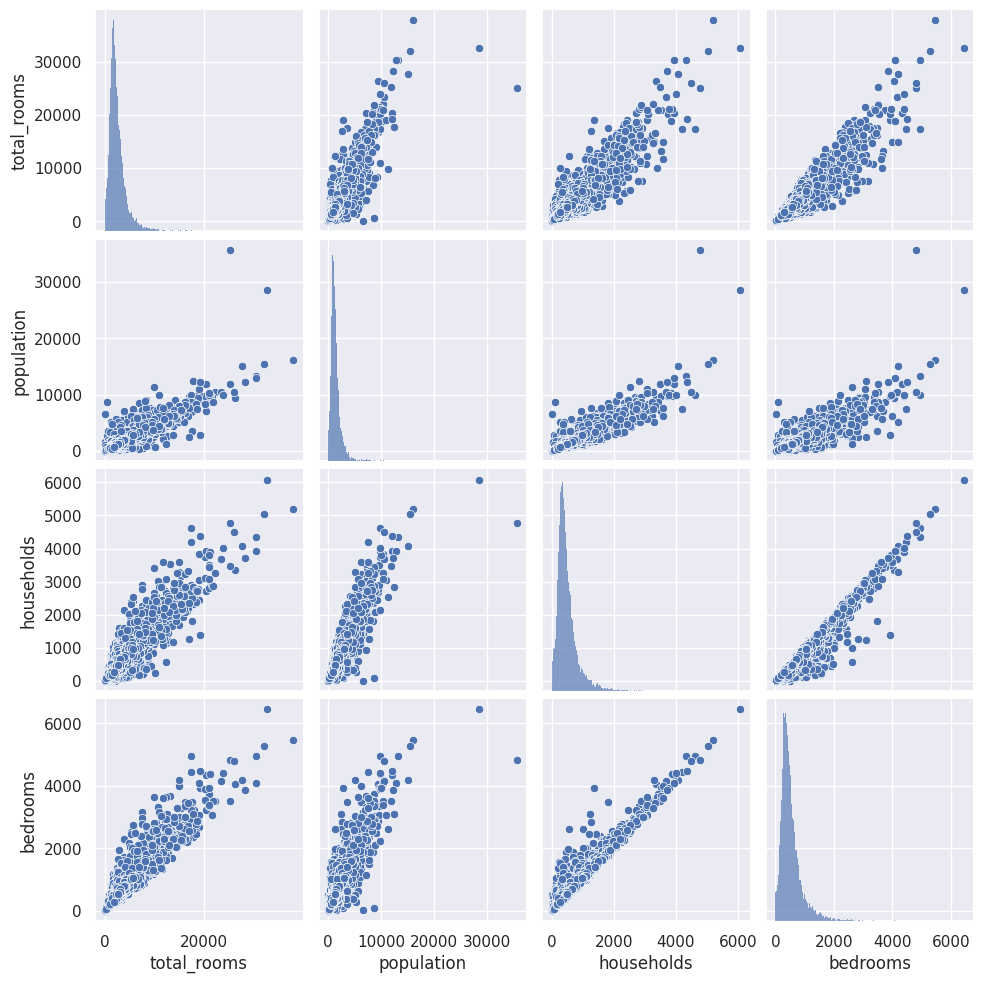

In [4]:
sns.pairplot(df)

Text(0, 0.5, 'bedrooms')

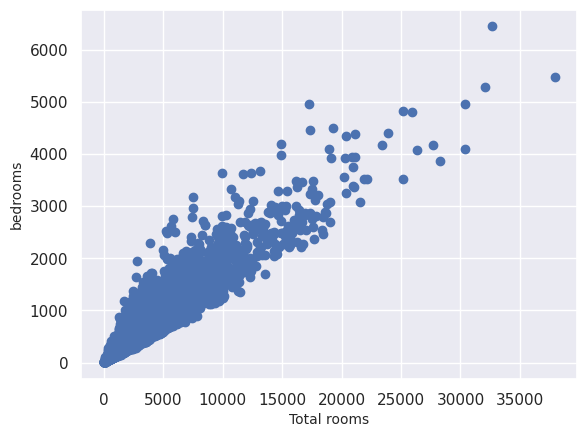

In [5]:
plt.scatter(df['total_rooms'],df['bedrooms'])
plt.xlabel('Total rooms',fontsize=10)
plt.ylabel('bedrooms',fontsize=10)

In [6]:
df_np=df.to_numpy()
df_np.shape

(17000, 4)

In [7]:
X_train, y_train = df_np[:,:3],df_np[:,-1]
X_train.shape, y_train.shape

((17000, 3), (17000,))

In [16]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(X_train, y_train)



LinearRegression()

In [17]:
y_predictions = sk_model.predict(X_train)

y_predictions

array([631.82986004, 693.11956219, 130.849378  , ..., 502.56126019,
       522.07260277, 304.4499167 ])

In [19]:
sk_model.score(X_train,y_train)

0.9681925736223069

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

mean_absolute_error(y_predictions,y_train), mean_squared_error(y_predictions,y_train), root_mean_squared_error(y_predictions,y_train)

(39.672217650706656, 5650.631822167879, 75.17068459291747)

In [10]:
prediction_df = pd.DataFrame({'total_rooms': df['total_rooms'],
                              'population' : df['population'],
                              'households' : df['households'],
                              'bedrooms'   : df['bedrooms'],
                              'Bedrooms predictions':y_predictions})
prediction_df

,total_rooms,population,households,bedrooms,Bedrooms predictions
0,5612.0,1015.0,472.0,1283.0,631.829860
1,7650.0,1129.0,463.0,1901.0,693.119562
2,720.0,333.0,117.0,174.0,130.849378
3,1501.0,515.0,226.0,337.0,259.462982
4,1454.0,624.0,262.0,326.0,289.315311
...,...,...,...,...,...
16995,2217.0,907.0,369.0,394.0,412.047168
16996,2349.0,1194.0,465.0,528.0,501.086730
16997,2677.0,1244.0,456.0,531.0,502.561260
16998,2672.0,1298.0,478.0,552.0,522.072603


<Axes: >

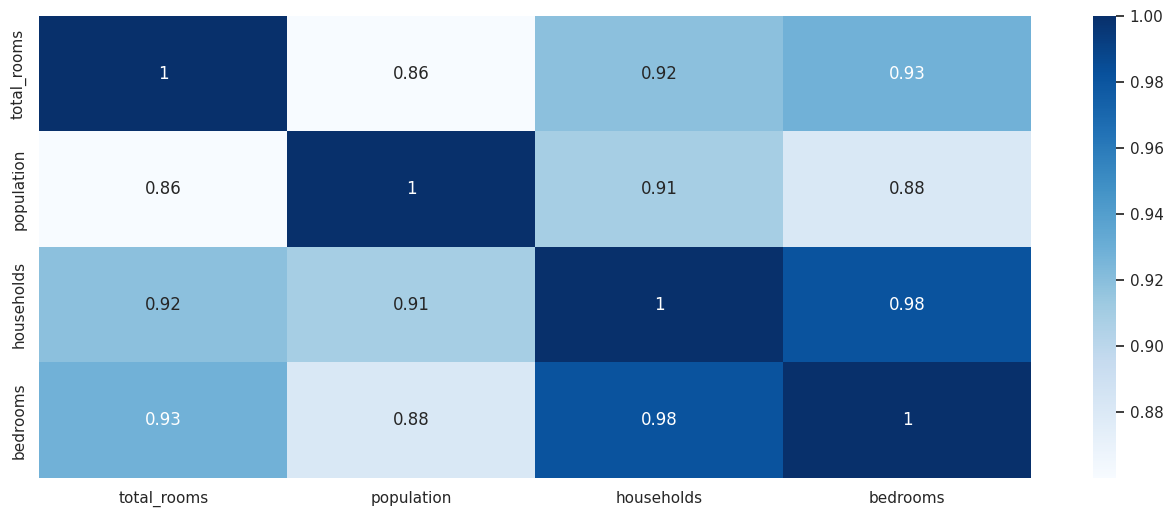

In [23]:
plt.figure(figsize=(16,6))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(),annot=True,cmap='Blues')
